In [10]:
import numpy as np
import pandas as pd
from itertools import product
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

## Zadania 4
#### 4.1 Proszę pokazać jak zmieniają się obszary decyzyjne oraz błąd generalizacji modelu dla różnej głębokości drzew decyzyjnych i różnej ilości prób bootstrapowych przy wykorzystaniu baggingu.  
#### 4.2 Proszę pokazać jak zmieniają się obszary decyzyjne oraz błąd generalizacji modelu SVM o jądrze wielomianowym dla różnych stopni wilomianu i różnej ilości prób bootstrapowych przy wykorzystaniu baggingu. 
#### 4.3 Proszę pokazać jak zmieniają się obszary decyzyjne oraz błąd generalizacji klasyfikatora kNN dla różnej ilości sąsiadów i różnej ilości prób bootstrapowych przy wykorzystaniu baggingu.

In [ ]:
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

In [4]:
cechy = ['feature1','feature2']
X3_train, X3_test, y3_train, y3_test = train_test_split(dane3[cechy], dane3['label'], test_size=0.2, random_state=1)

# Funkcja rysująca

In [38]:
def cp(bags, titles):
    
    x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
    y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 10))

    for idx, clf, tt in zip(product([0, 1], [0, 1]), bags, titles):

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
        axarr[idx[0], idx[1]].scatter(dane3.iloc[0:100, 0], dane3.iloc[0:100, 1], c=dane3.label[0:100], alpha=0.4)
        axarr[idx[0], idx[1]].set_title(tt)

    plt.show()


In [39]:
bagging_params = (0.2, 0.5, 0.8)

# kNN

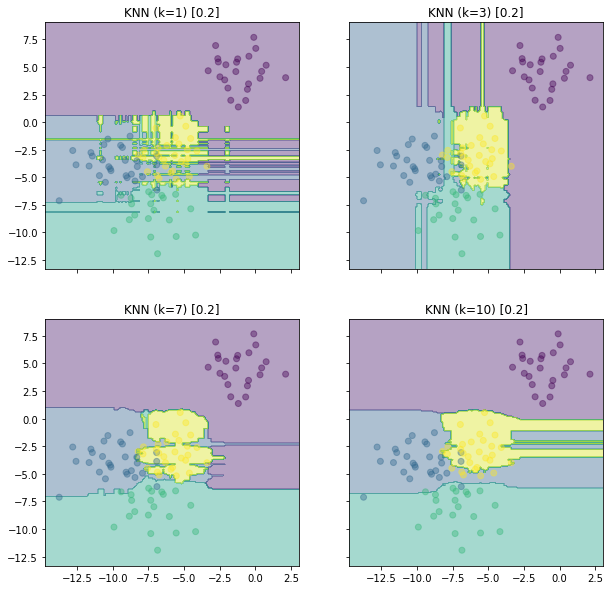

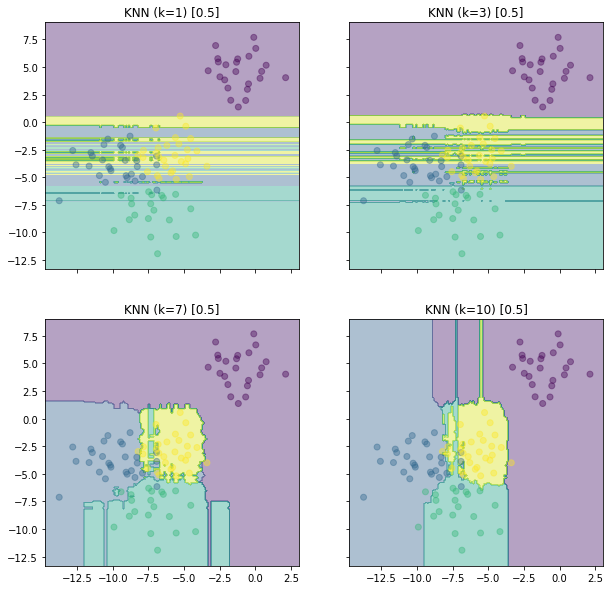

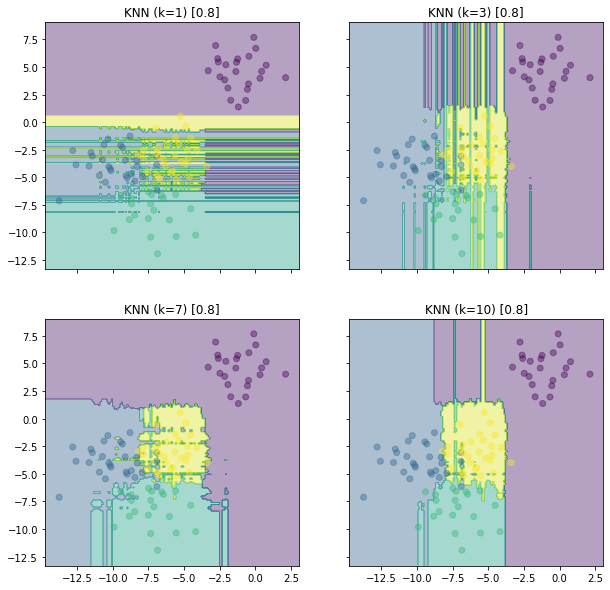

In [36]:
for par in bagging_params:
    
    
    bagging1 = BaggingClassifier(KNeighborsClassifier(1), max_samples=par, max_features=par)
    bagging1.fit(X3_train, y3_train)
    
    bagging3 = BaggingClassifier(KNeighborsClassifier(3), max_samples=par, max_features=par)
    bagging3.fit(X3_train, y3_train)
    
    bagging7 = BaggingClassifier(KNeighborsClassifier(7), max_samples=par, max_features=par)
    bagging7.fit(X3_train, y3_train)
    
    bagging10 = BaggingClassifier(KNeighborsClassifier(10), max_samples=par, max_features=par)
    bagging10.fit(X3_train, y3_train)
    
    bags = [bagging1, bagging3, bagging7, bagging10]
    titles = [f'KNN (k={k}) [{par}]' for k in [1, 3, 7, 10]]
    
    cp(bags, titles)

# Drzewa Decyzyjne

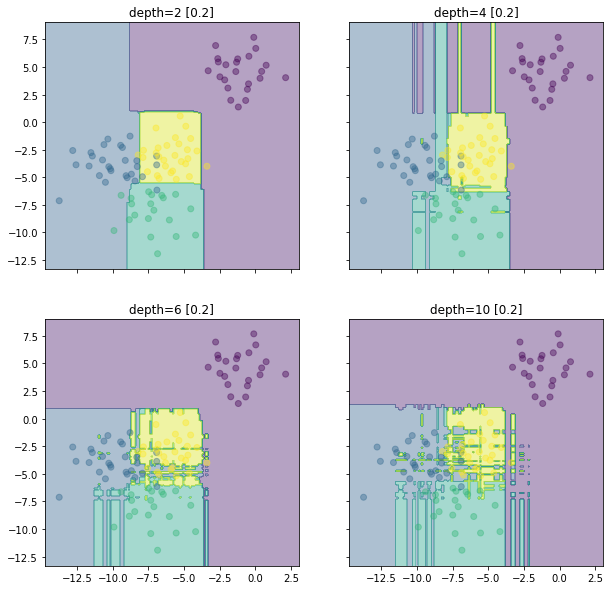

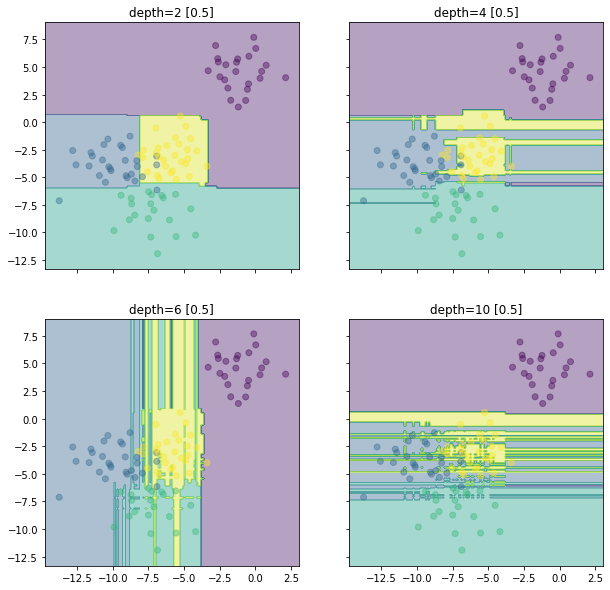

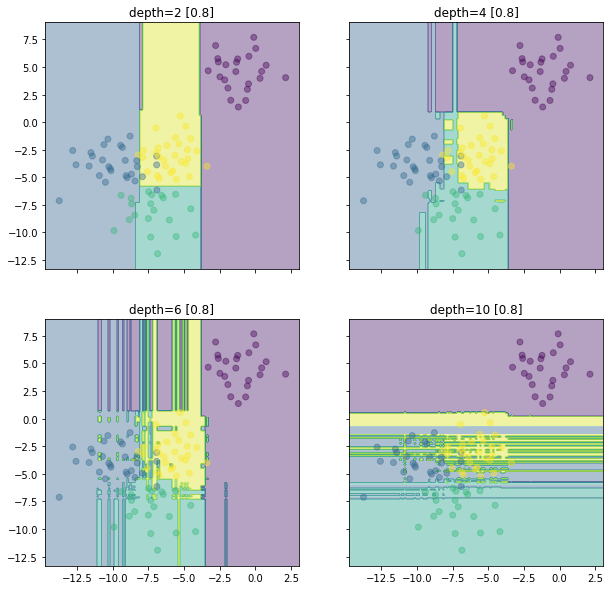

In [32]:
for par in bagging_params:
    
    clf = tree.DecisionTreeClassifier(max_depth=2)
    bag_tree_2 = BaggingClassifier(clf, max_samples=par, max_features=par)
    bag_tree_2.fit(X3_train, y3_train)
    
    clf = tree.DecisionTreeClassifier(max_depth=4)
    bag_tree_4 = BaggingClassifier(clf, max_samples=par, max_features=par)
    bag_tree_4.fit(X3_train, y3_train)
    
    clf = tree.DecisionTreeClassifier(max_depth=6)
    bag_tree_6 = BaggingClassifier(clf, max_samples=par, max_features=par)
    bag_tree_6.fit(X3_train, y3_train)
    
    clf = tree.DecisionTreeClassifier(max_depth=10)
    bag_tree_10 = BaggingClassifier(clf, max_samples=par, max_features=par)
    bag_tree_10.fit(X3_train, y3_train)
    
    bags = [bag_tree_2, bag_tree_4, bag_tree_6, bag_tree_10]
    titles = [f'depth={depth} [{par}]' for depth in [2, 4, 6, 10]]
    
    cp(bags, titles)
    

# SVM

/home/mccastles/snap/code/common/.cache/pypoetry/virtualenvs/workspace-py3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/mccastles/snap/code/common/.cache/pypoetry/virtualenvs/workspace-py3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/mccastles/snap/code/common/.cache/pypoetry/virtualenvs/workspace-py3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/mccastles/snap/code/common/.cache/pypoetry/virtualenvs/workspace-py3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of

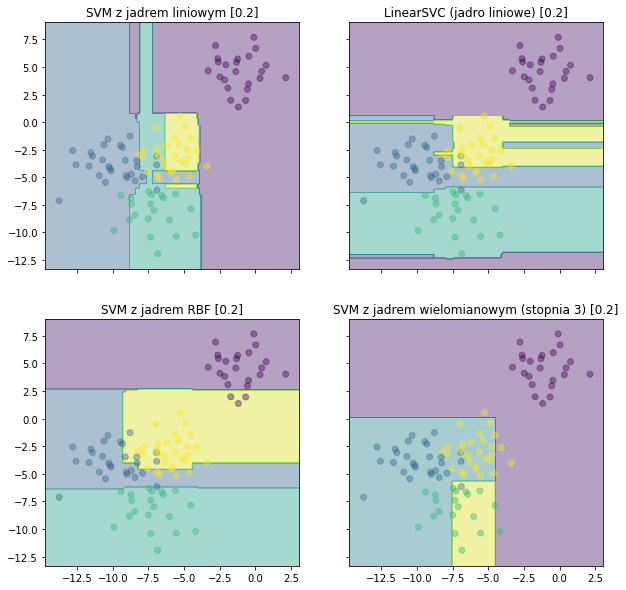

/home/mccastles/snap/code/common/.cache/pypoetry/virtualenvs/workspace-py3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/mccastles/snap/code/common/.cache/pypoetry/virtualenvs/workspace-py3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/mccastles/snap/code/common/.cache/pypoetry/virtualenvs/workspace-py3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/mccastles/snap/code/common/.cache/pypoetry/virtualenvs/workspace-py3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of

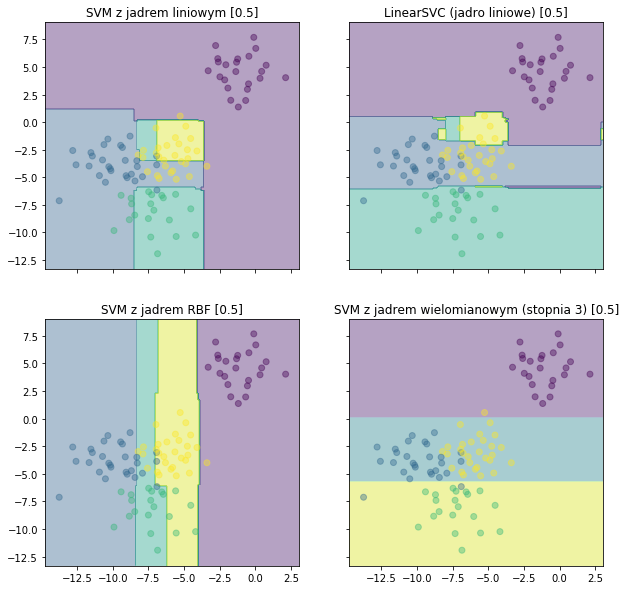

/home/mccastles/snap/code/common/.cache/pypoetry/virtualenvs/workspace-py3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/mccastles/snap/code/common/.cache/pypoetry/virtualenvs/workspace-py3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/mccastles/snap/code/common/.cache/pypoetry/virtualenvs/workspace-py3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/mccastles/snap/code/common/.cache/pypoetry/virtualenvs/workspace-py3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of

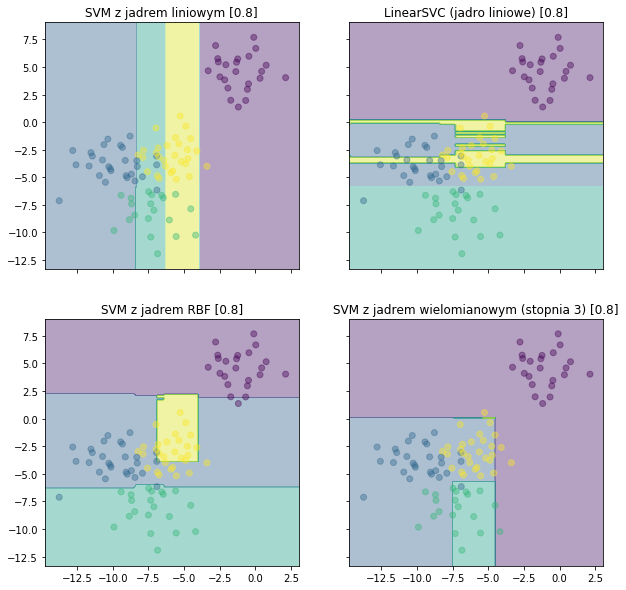

In [40]:
for par in bagging_params:
    
    C=1.0
    
    clf = svm.SVC(kernel='linear', C=C)
    bag_svm1 = BaggingClassifier(clf, max_samples=par, max_features=par)
    bag_svm1.fit(X3_train, y3_train)
    
    clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
    bag_svm2 = BaggingClassifier(clf, max_samples=par, max_features=par)
    bag_svm2.fit(X3_train, y3_train)
    
    clf = svm.SVC(kernel='poly', degree=3, C=C, gamma='scale')
    bag_svm3 = BaggingClassifier(clf, max_samples=par, max_features=par)
    bag_svm3.fit(X3_train, y3_train)
    
    clf = svm.LinearSVC(C=C)
    bag_svm4 = BaggingClassifier(clf, max_samples=par, max_features=par)
    bag_svm4.fit(X3_train, y3_train)
    
    bags = [bag_svm1, bag_svm2, bag_svm3, bag_svm4]
    titles = [f'SVM z jadrem liniowym [{par}]',
                            f'LinearSVC (jadro liniowe) [{par}]',
                            f'SVM z jadrem RBF [{par}]',
                            f'SVM z jadrem wielomianowym (stopnia 3) [{par}]']
    
    cp(bags, titles)